#Smartphones Price Prediction using Supervised Machine Learning Algorithms


**About Dataset**

1. brand_name: The brand or manufacturer name of the mobile phone.

2. model: The model name or identifier of the mobile phone.

3. price: The price of the mobile phone.

4. avg_rating: The average rating or user review score of the mobile phone.

5. 5G_or_not: Whether the mobile phone supports 5G connectivity (binary variable).

6. processor_brand: The brand of the processor used in the mobile phone.

7. num_cores: The number of processor cores.

8. processor_speed: The speed or clock frequency of the processor.

9. battery_capacity: The capacity of the mobile phone&#39;s battery.

10. fast_charging_available: Whether fast charging is available (binary variable).

11. fast_charging: The type of fast charging technology used.

12. ram_capacity: The amount of RAM (Random Access Memory) in the mobile phone.

13. internal_memory: The internal storage capacity of the mobile phone.

14. screen_size: The size of the mobile phone&#39;s screen.

15. refresh_rate: The refresh rate of the screen.

16. num_rear_cameras: The number of rear cameras in the mobile phone.

17. os: The operating system used in the mobile phone.

18. primary_camera_rear: The specifications of the primary rear camera.

19. primary_camera_front: The specifications of the primary front camera.

20. extended_memory_available: Whether extended memory (e.g., microSD) is available (binary
variable).

21. resolution_height: The resolution height of the mobile phone&#39;s display.

22. resolution_width: The resolution width of the mobile phone&#39;s display.

Importing neccessary libraries required

In [68]:
import numpy as np                                  # Implemennts milti-dimensional array and matrices
import pandas as pd                                 # For data manipulation and analysis
import matplotlib.pyplot as plt                     # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                               # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

import warnings                                     # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

from subprocess import check_output

In [69]:
#reading the dataset
df1=pd.read_csv("/content/smartphones.csv")

In [70]:
#reading top 5 rows
df1.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,NaN,4,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,NaN,4,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,18.0,4,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,NaN,4,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,NaN,4,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


## **EDA-Exploratory Data Analysis**

In [71]:
# reading the columns
df1.columns

Index(['brand_name', 'model', 'price', 'avg_rating', '5G_or_not',
       'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'os', 'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'resolution_height', 'resolution_width'],
      dtype='object')

In [72]:
# column data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

In [73]:
#shape of the dataframe
df1.shape

(980, 22)

In [74]:
#statistics of each numerical columns
df1.describe()

,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
count,980.000000,879.000000,980.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,975.000000,980.000000,980.000000,980.000000
mean,32520.504082,7.825825,0.560204,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,50.319286,16.589744,0.630612,2214.663265,1075.852041
std,39531.812669,0.740285,0.496616,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,33.000968,10.876944,0.482885,516.484254,290.164931
min,3499.000000,6.000000,0.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,2.000000,0.000000,0.000000,480.000000,480.000000
25%,12999.000000,7.400000,0.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,24.000000,8.000000,0.000000,1612.000000,1080.000000
50%,19994.500000,8.000000,1.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,50.000000,16.000000,1.000000,2400.000000,1080.000000
75%,35491.500000,8.400000,1.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,64.000000,16.000000,1.000000,2408.000000,1080.000000
max,650000.000000,8.900000,1.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,200.000000,60.000000,1.000000,3840.000000,2460.000000


In [75]:
#statistics of both numerical and categorical columns
df1.describe(include='all')

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
count,980,980,980.000000,879.000000,980.000000,960,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,966,980.000000,975.000000,980.000000,980.000000,980.000000
unique,46,980,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,xiaomi,Apple iPhone 11,NaN,NaN,NaN,snapdragon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,NaN,NaN
freq,134,1,NaN,NaN,NaN,413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,909,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,32520.504082,7.825825,0.560204,NaN,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,NaN,50.319286,16.589744,0.630612,2214.663265,1075.852041
std,NaN,NaN,39531.812669,0.740285,0.496616,NaN,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,NaN,33.000968,10.876944,0.482885,516.484254,290.164931
min,NaN,NaN,3499.000000,6.000000,0.000000,NaN,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,NaN,2.000000,0.000000,0.000000,480.000000,480.000000
25%,NaN,NaN,12999.000000,7.400000,0.000000,NaN,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,NaN,24.000000,8.000000,0.000000,1612.000000,1080.000000
50%,NaN,NaN,19994.500000,8.000000,1.000000,NaN,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,NaN,50.000000,16.000000,1.000000,2400.000000,1080.000000
75%,NaN,NaN,35491.500000,8.400000,1.000000,NaN,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,NaN,64.000000,16.000000,1.000000,2408.000000,1080.000000


In [76]:
#unique value counts in each column count
df1.nunique()

,0
brand_name,46
model,980
price,379
avg_rating,30
5G_or_not,2
processor_brand,13
num_cores,3
processor_speed,35
battery_capacity,89
fast_charging_available,2


In [77]:
#checking null values in  each column in descending order
df1.isnull().sum().sort_values(ascending=False)

,0
fast_charging,211
avg_rating,101
processor_speed,42
processor_brand,20
os,14
battery_capacity,11
num_cores,6
primary_camera_front,5
brand_name,0
refresh_rate,0


In [78]:
#checking null values and their percentage in the dataframe
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                           Total   Percent
fast_charging                211  0.215306
avg_rating                   101  0.103061
processor_speed               42  0.042857
processor_brand               20  0.020408
os                            14  0.014286
battery_capacity              11  0.011224
num_cores                      6  0.006122
primary_camera_front           5  0.005102
brand_name                     0  0.000000
refresh_rate                   0  0.000000
resolution_height              0  0.000000
extended_memory_available      0  0.000000
primary_camera_rear            0  0.000000
num_rear_cameras               0  0.000000
ram_capacity                   0  0.000000
screen_size                    0  0.000000
internal_memory                0  0.000000
model                          0  0.000000
fast_charging_available        0  0.000000
5G_or_not                      0  0.000000
price                          0  0.000000
resolution_width               0  0.000000


In [79]:
#max and min priced mobile in the dataset
print("'price'")
print("Minimum price: ", df1["price"].min())
print("Maximum price: ", df1["price"].max())
print("How many values are NaN?: ", pd.isnull(df1['price']).sum())
print("How many values are 0? : ",df1.price[df1.price == 0].count())

'price'
Minimum price:  3499
Maximum price:  650000
How many values are NaN?:  0
How many values are 0? :  0


The costliest Mobile price is 650000 and cheapest is 3499

In [80]:
# bigegst and lowest battery capacity
print("'battery_capacity'")
print("Minimum battery_capacity: ", df1["battery_capacity"].min())
print("Maximum battery_capacity: ", df1["battery_capacity"].max())
print("How many values are NaN?: ", pd.isnull(df1['battery_capacity']).sum())
print("How many values are 0? : ",df1.battery_capacity[df1.battery_capacity == 0].count())


'battery_capacity'
Minimum battery_capacity:  1821.0
Maximum battery_capacity:  22000.0
How many values are NaN?:  11
How many values are 0? :  0


The highest battery capacity is 22000 mah and lowest battery capacity is 1821 mah

In [81]:
# making a copy of the original dataframe to work without modifying original dataframe
df2=df1.copy()
df2.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,NaN,4,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,NaN,4,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,18.0,4,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,NaN,4,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,NaN,4,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


## Handling Missing values

In [82]:
# replacing null values in 'avg_rating' column with mean vale and rounding
df2['avg_rating'].fillna(df2['avg_rating'].mean(),inplace=True)

# round the avg rating
df2['avg_rating']=df2['avg_rating'].round(1)

In [83]:
# filling null values in processorspeed and fastcharging column with mean
df2['processor_speed'].fillna(df2['processor_speed'].mean(),inplace=True)
df2['fast_charging'].fillna(df2['fast_charging'].mean(),inplace=True)

In [84]:
#filling num_cores and primary_camera_front column with 0
df2['num_cores']=df2['num_cores'].fillna(0)
df2['primary_camera_front']=df2['primary_camera_front'].fillna(0)

In [85]:
#replacing the null values in os column with respect to brand name
df2['os']=np.where(df2['os'].isnull(),
                    np.where(df2['brand_name'] == 'apple', 'ios', 'android'),
                    df2['os'])

In [86]:
# replacing  the processor_brand column with mode
df2['processor_brand']=df2['processor_brand'].fillna(df2['processor_brand'].mode().iloc[0])

In [87]:
#filling fastcharging column
df2['fast_charging']=df2['fast_charging'].fillna(0)

In [88]:
#replacing battery_capacity column nan values with interpolate
df2['battery_capacity']= df2['battery_capacity'].interpolate()

In [89]:
#processor speed column null values is filled with mode
df2['processor_speed']= df2['processor_speed'].fillna(df2['processor_speed'].mode().iloc[0])  # Assuming a single mode

In [90]:
df2.isnull().sum().sort_values(ascending=False)

,0
brand_name,0
model,0
resolution_height,0
extended_memory_available,0
primary_camera_front,0
primary_camera_rear,0
os,0
num_rear_cameras,0
refresh_rate,0
screen_size,0


# Data Preprocessing

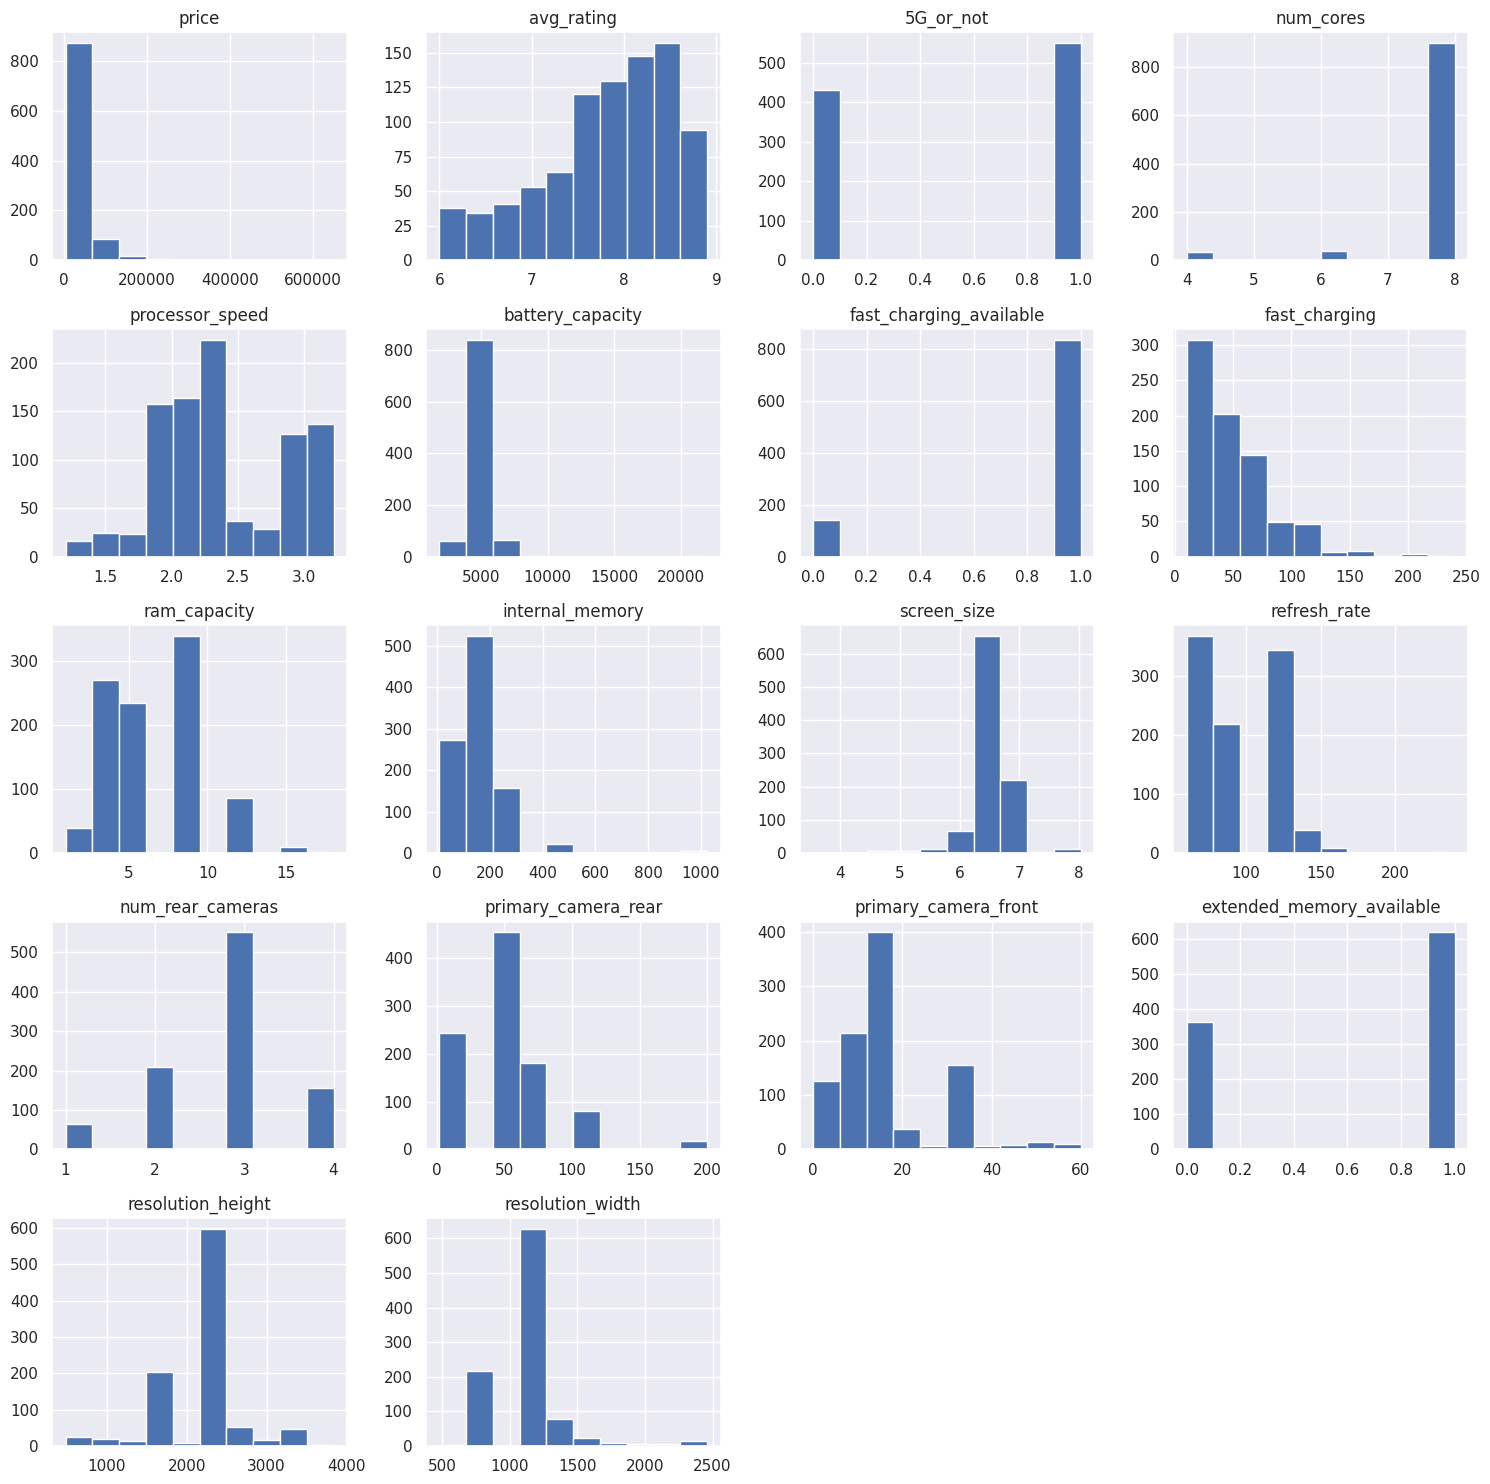

In [91]:
#Analyzing data in each column
df1.hist(figsize=(15, 15))
plt.tight_layout()
plt.show()

In [92]:
#making a copy
df3=df2.copy()

In [93]:
# Encoding the categoral columns using label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding
df3['processor_brand_encoded'] = label_encoder.fit_transform(df2['processor_brand'])
df3['os_encoded'] = label_encoder.fit_transform(df2['os'])
df3['brand_name_encoded'] = label_encoder.fit_transform(df2['brand_name'])
df3['model_encoded']=label_encoder.fit_transform(df2['model'])

# View the result
df3.drop(columns=['model','brand_name','processor_brand','os'],inplace=True)

In [94]:
df3.head()

,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width,processor_brand_encoded,os_encoded,brand_name_encoded,model_encoded
0,38999,7.3,0,6.0,2.65,3110.000000,0,46.126138,4,64,6.1,60,2,12.0,12.0,0,1792,828,0,1,0,0
1,46999,7.5,0,6.0,2.65,3110.000000,0,46.126138,4,128,6.1,60,2,12.0,12.0,0,1792,828,0,1,0,1
2,109900,7.7,0,6.0,2.65,3500.000000,1,18.000000,4,64,6.5,60,3,12.0,12.0,0,2688,1242,0,1,0,2
3,51999,7.4,1,6.0,3.10,3471.111111,0,46.126138,4,64,6.1,60,2,12.0,12.0,0,2532,1170,0,1,0,3
4,55999,7.5,1,6.0,3.10,3442.222222,0,46.126138,4,128,6.1,60,2,12.0,12.0,0,2532,1170,0,1,0,4


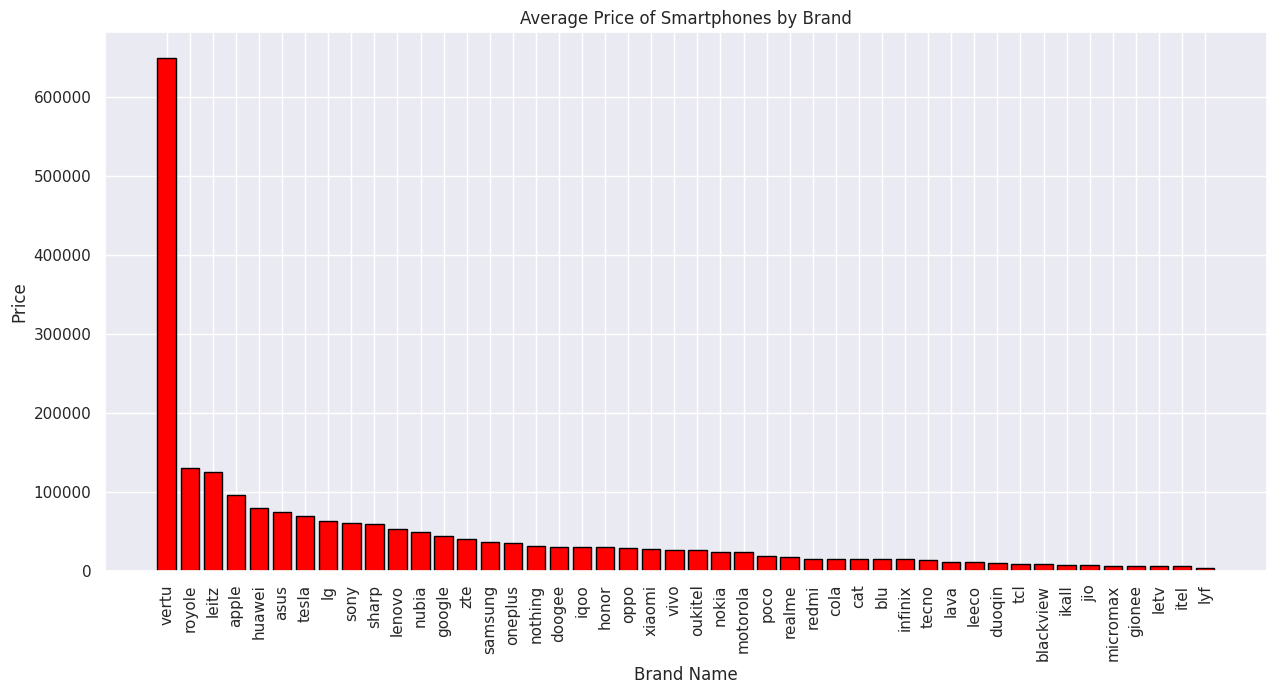

In [95]:
# finding the over priced mobile brand
avg_price=df2.groupby('brand_name')['price'].mean().reset_index()
avg_price=avg_price.sort_values(by='price',ascending=False)
plt.figure(figsize=(15,7))
plt.bar(avg_price['brand_name'],avg_price['price'],color='red',edgecolor='black')
plt.xticks(rotation=90)
plt.title('Average Price of Smartphones by Brand')
plt.xlabel('Brand Name')
plt.ylabel('Price')
plt.show()

From the above dataset the top priced mobile brand is 'VERTU' which costs 6,50,000

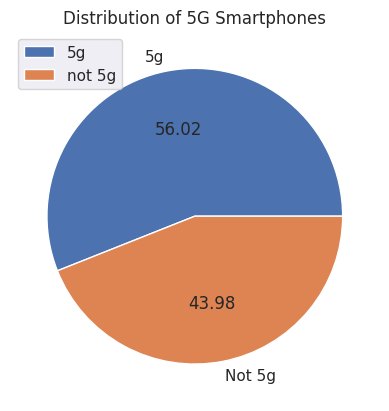

In [96]:
# finding the percentage of 5g and not 5g mobiles
names=['5g','Not 5g']
cols=df2['5G_or_not'].value_counts()
plt.pie(cols,labels=names,autopct='%0.2f')
plt.legend(['5g','not 5g'])
plt.title('Distribution of 5G Smartphones')
plt.show()

In the Smartphones data the most number of Mobile phones are 5g smartphones (56.02%) and not %g smartphones are (43.98%)

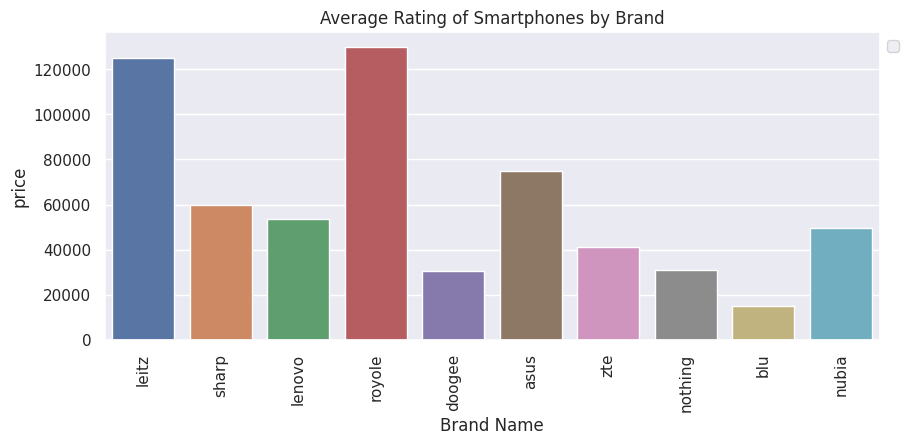

In [97]:
# Top 1-0 mobiles based on avg rating and their price
avg_rating=df2.groupby('brand_name')[['price','avg_rating']].mean().reset_index()
avg_rating=avg_rating.sort_values(by='avg_rating',ascending=False)[:10]
plt.figure(figsize=(10,4))
sns.barplot(x='brand_name',y='price',data=avg_rating,palette='deep')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Average Rating of Smartphones by Brand')
plt.xlabel('Brand Name')
plt.ylabel('price')
plt.xticks(rotation=90)
plt.show()

The highly rated mobilephone brand is Leitz and which costs 1,20,000

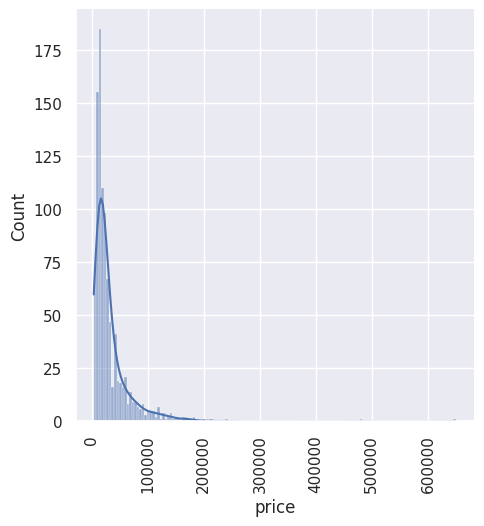

In [98]:
# Create histograms for Price Distributions
sns.displot(x=df2['price'],kde=True)
plt.xticks(rotation=90)
# Show the plot
plt.show()

This Distribution shows that most of the mobiles lies in range of 20,000 to 1,00,000

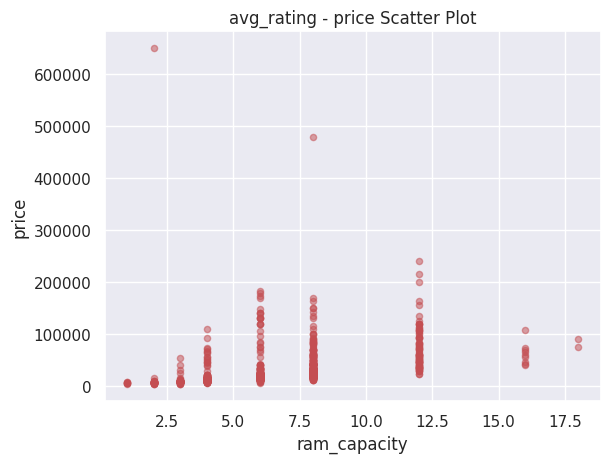

In [99]:
# finding price based on the RAM capacity
df3.plot(kind = 'scatter', x='ram_capacity', y = 'price', alpha = 0.5, color = 'r')
plt.xlabel("ram_capacity")
plt.ylabel("price")
plt.title("avg_rating - price Scatter Plot")
plt.show()

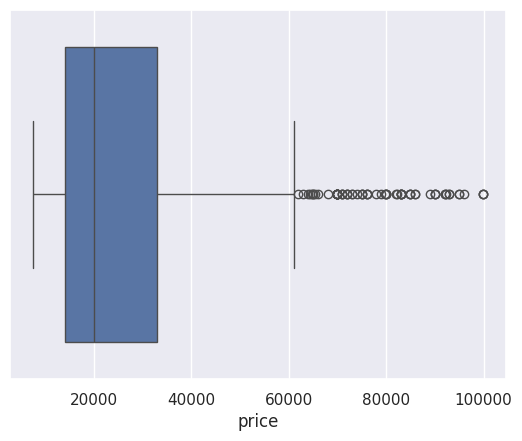

In [100]:
#finding outlier and plotting the price column
plt.figure.figsize=(20,20)
max_val=df3.price.quantile(0.95)
min_val=df3.price.quantile(0.05)
df3_outliers=df3[(df3.price<max_val) & (df3.price>min_val)]
sns.boxplot(x=df3_outliers['price'])
plt.show()

In [101]:
#importing libraries for Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [102]:
#scaling the dataset
std_scaler=StandardScaler()
price_pred=df3[['price']]
price_pred=std_scaler.fit_transform(price_pred)
price_pred[:10]

array([[0.16396424],
       [0.36643623],
       [1.95839756],
       [0.49298123],
       [0.59421722],
       [0.89792521],
       [0.21458224],
       [0.34112724],
       [0.59421722],
       [2.21148755]])

In [103]:
# splitting training data and splitting data
x=df3.drop('price',axis=1)
y=df3[['price']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (784, 21)
X_test shape: (196, 21)
y_train shape: (784, 1)
y_test shape: (196, 1)


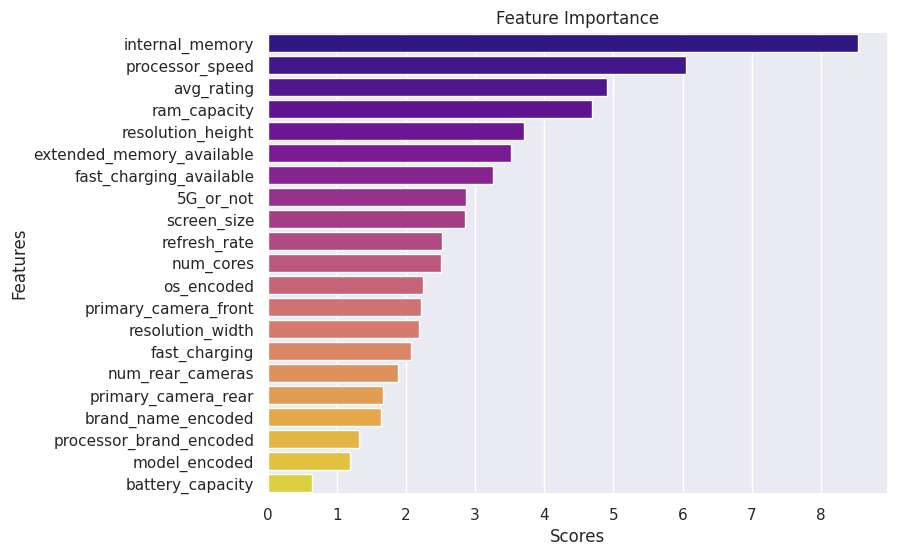

In [104]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(x, y)
feature_scores = selector.scores_
feature_names = x.columns
feature_score_df = pd.DataFrame({'Features': feature_names, 'Scores': feature_scores})

feature_score_df = feature_score_df.sort_values(by='Scores', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Scores', y='Features', data=feature_score_df, palette='plasma')
plt.title('Feature Importance')
plt.xlabel('Scores')
plt.ylabel('Features')
plt.show()

In [105]:
#fitting the model
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [106]:
#predicting the y values
y_pred=lr.predict(X_test)

In [107]:
y_pred

array([[ 81327.51160878],
       [  4058.88109923],
       [ 61312.51292663],
       [  1735.22894132],
       [ 48204.98107635],
       [ 81940.35121724],
       [ 38541.84190296],
       [ 44257.87333363],
       [ 21786.745396  ],
       [ 25363.20395053],
       [ 26214.57187821],
       [ 46233.56196735],
       [ 53943.66056499],
       [123079.84112048],
       [   357.36436436],
       [ 15515.72349785],
       [ 69605.25256391],
       [ 22160.95404825],
       [ 11298.0364795 ],
       [ 74158.56155749],
       [ 12372.50487771],
       [ 83870.52001948],
       [ 46102.92168184],
       [ 15416.46783369],
       [ 25072.4970454 ],
       [ 43412.55223083],
       [ 27666.97055032],
       [ 23567.94478211],
       [ 18908.06894883],
       [ 63423.61226052],
       [123063.26308749],
       [ 84240.90699204],
       [ -2792.12925433],
       [ 20832.83389916],
       [ -6105.43251614],
       [ 29709.04267454],
       [ 32929.67672528],
       [ -7615.59095406],
       [ 130

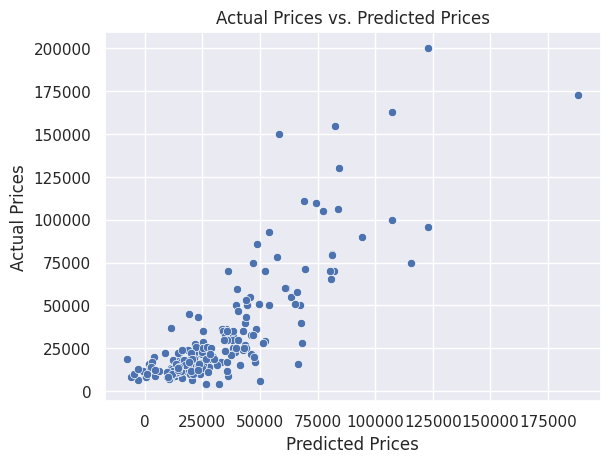

In [108]:
import numpy as np
y_pred=y_pred.flatten()
y_test = y_test.values.flatten()
sns.scatterplot(x=y_pred,y=y_test)
plt.ylabel('Actual Prices')
plt.xlabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

In [109]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Assuming y_test and y_pred are already defined (true and predicted values)
# X_test is your test data containing independent variables

# Calculate R-squared
r2_lr = r2_score(y_test, y_pred)
print(f'R-squared: {r2_lr:.2f}')

# Calculate Adjusted R-squared
n = len(y_test)  # Number of observations
p = X_test.shape[1]  # Number of predictors

adjusted_r2_lr = 1 - (1 -r2_lr) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r2_lr:.2f}')

# Calculate Mean Squared Error (MSE)
mse_lr = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse_lr:.2f}')

# Calculate Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae_lr:.2f}')


R-squared: 0.69
Adjusted R-squared: 0.65
Mean Squared Error (MSE): 336690998.29
Mean Absolute Error (MAE): 12133.28


In [110]:
#finding RMSE
rmse_lr = np.sqrt(mse_lr)
print("RMSE value: {:.4f}".format(rmse_lr))

RMSE value: 18349.1416


In [111]:
accuracy_score_lr = lr.score(X_test, y_test)
print(f'Accuracy Score: {accuracy_score_lr:.2f}')

Accuracy Score: 0.69


Plotting the Residuals

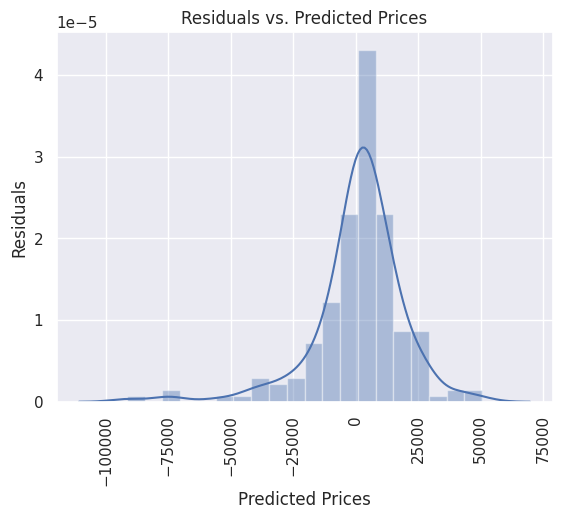

In [112]:
# plotting residuals
residuals_lr=y_pred-y_test
sns.distplot(residuals_lr,bins=20)
plt.ylabel('Residuals')
plt.xlabel('Predicted Prices')
plt.xticks(rotation=90)
plt.title('Residuals vs. Predicted Prices')
plt.show()

##Checking for Descision Tree Regressor

In [113]:
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [114]:
# Separate features (X) and target variable (y)
X_dtr = df3.drop('price', axis=1)  # Replace 'target_variable_column'
y_dtr = df3['price']

scaler = StandardScaler()
X_dtr_scaled = scaler.fit_transform(X_dtr)
model_dtr = DecisionTreeRegressor()

In [157]:
 #instantiate the DecisionTreeClassifier model with criterion gini index
X_dtr_train, X_dtr_test, y_dtr_train, y_dtr_test = train_test_split(X_dtr, y_dtr, test_size=0.2, random_state=42)

clf_gini = DecisionTreeRegressor(criterion='poisson',max_depth=3,min_samples_split=10, min_samples_leaf=5, random_state=0)



# fit the model
clf_gini.fit(X_train, y_train)


DecisionTreeRegressor(criterion='poisson', max_depth=3, min_samples_leaf=5,
                      min_samples_split=10, random_state=0)

In [158]:
y_pred_gini = clf_gini.predict(X_dtr_test)

In [159]:
y_pred_gini

array([ 75793.34782609,  35746.80838323,  75793.34782609,  10567.43877551,
        19327.08896797,  75793.34782609,  35746.80838323,  35746.80838323,
        19327.08896797,  35746.80838323,  19327.08896797,  19327.08896797,
        75793.34782609, 144089.05882353,  10567.43877551,  19327.08896797,
        75793.34782609,  19327.08896797,  10567.43877551,  75793.34782609,
        10567.43877551,  75793.34782609,  10567.43877551,  19327.08896797,
        19327.08896797,  75793.34782609,  19327.08896797,  19327.08896797,
        19327.08896797,  72162.53846154, 144089.05882353,  75793.34782609,
        10567.43877551,  35746.80838323,  10567.43877551,  35746.80838323,
        19327.08896797,  10567.43877551,  10567.43877551,  72162.53846154,
        19327.08896797,  10567.43877551,  19327.08896797,  10567.43877551,
        10567.43877551,  35746.80838323,  35746.80838323,  75793.34782609,
        75793.34782609,  10567.43877551,  10567.43877551,  35746.80838323,
        75793.34782609,  

In [160]:
accuracy_score_clf_gini  =clf_gini .score(X_test, y_test)

print(f'Accuracy Score: {accuracy_score_clf_gini :.2f}')

Accuracy Score: 0.47


In [161]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_dtr_train, y_dtr_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_dtr_test, y_dtr_test)))

Training set score: 0.4802
Test set score: 0.4736


# Evaluation Metrics

In [162]:
# Calculate R-squared (R2)
r2_dtr = r2_score(y_dtr_test, y_pred_gini)

#adjusted R2
adjusted_r2_dtr = 1 - (1 - r2_dtr) * (n - 1) / (n - p - 1)

# Calculate Mean Squared Error (MSE)
mse_dtr = mean_squared_error(y_dtr_test, y_pred_gini)

#calculate Mean Absolute Error (MAE)
mae_dtr = mean_absolute_error(y_dtr_test, y_pred_gini)

# Print the results
print('R-squared (R2): {0:0.4f}'.format(r2_dtr))
print(f'Adjusted R-squared: {adjusted_r2_dtr:.2f}')
print('Mean Squared Error (MSE): {0:0.4f}'.format(mse_dtr))
print(f'Mean Absolute Error (MAE): {mae_dtr:.2f}')

R-squared (R2): 0.4736
Adjusted R-squared: 0.41
Mean Squared Error (MSE): 564508033.0749
Mean Absolute Error (MAE): 11740.22


In [163]:
#root mean squared error
rmse_dtr = np.sqrt(mse_dtr)
print("RMSE value: {:.4f}".format(rmse_dtr))

RMSE value: 23759.3778


Random Forest


In [164]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [165]:
# splitting training data and testing data
x_rfr=df3.drop('price',axis=1)
y_rfr=df3['price']
X_rfr_train, X_rfr_test, y_rfr_train, y_rfr_test = train_test_split(x_rfr, y_rfr, test_size=0.2, random_state=42)


In [166]:
rfc = RandomForestRegressor(n_estimators=200, max_depth=10,min_samples_split=5,min_samples_leaf=2, random_state=0)
rfc.fit(X_rfr_train, y_rfr_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200, random_state=0)

In [167]:
y_rfr_pred = rfc.predict(X_rfr_test)
y_rfr_pred

array([ 70173.78339194,  29588.08562956,  60906.26336992,  13694.18541633,
        29473.40801012,  65985.99560606,  41221.56501124,  32578.99518237,
        19556.36682209,  31840.34008125,  14721.99425398,  26244.39521223,
        81841.2967394 , 148014.16306548,   9116.830101  ,  22279.07192807,
        83281.44875887,  15543.49468738,  14433.97307355,  93545.09646951,
        10492.42931045,  99533.40094958,  15795.49027711,  24588.99453898,
        23626.07190994,  46067.97218392,  20010.79949422,  21685.21648155,
        27910.82426707,  72506.08037011, 122269.64976786, 123394.47980519,
         6403.26672722,  23897.29975418,   9158.96823242,  30849.91504655,
        24696.4936958 ,  14518.17301189,   8532.65428566,  62065.0827313 ,
        17638.34767499,   9029.41370601,  15377.76288833,   7878.68791024,
         8841.41057419,  31401.74185008,  30832.18209435,  64929.66974357,
       108169.49948863,   9377.7805914 ,  12552.33055135,  57765.92704168,
       114862.27320416,  

In [168]:
#r2 score
r2_rfr=r2_score(y_rfr_test, y_rfr_pred)
print('R-squared (R2): {0:0.4f}'.format(r2_rfr))

#adjusted r2
n = len(y_rfr_test)  # Number of observations
p = X_rfr_test.shape[1]
adjusted_r2_rfr = 1 - (1 - r2_rfr) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r2_rfr:.2f}')

#mse
mse_rfr = mean_squared_error(y_rfr_test, y_rfr_pred)
print('Mean Squared Error (MSE): {0:0.4f}'.format(mse_rfr))

#mae
mae_rfr = mean_absolute_error(y_rfr_test, y_rfr_pred)
print(f'Mean Absolute Error (MAE): {mae_rfr:.2f}')

#rmse
rmse_rfr = np.sqrt(mse_rfr)
print("RMSE value: {:.4f}".format(rmse_rfr))

R-squared (R2): 0.7349
Adjusted R-squared: 0.70
Mean Squared Error (MSE): 284282890.3258
Mean Absolute Error (MAE): 7295.36
RMSE value: 16860.6907


In [169]:
print('Training set score: {:.4f}'.format(rfc.score(X_rfr_train, y_rfr_train)))

print('Test set score: {:.4f}'.format(rfc.score(X_rfr_test, y_rfr_test)))

Training set score: 0.7292
Test set score: 0.7349


In [170]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['squared_error', 'abosolute_error']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring= 'r2')
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=10, min_samples_leaf=2,
                                             min_samples_split=5,
                                             n_estimators=200, random_state=0),
             param_grid={'criterion': ['squared_error', 'abosolute_error'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='r2')

In [171]:
CV_rfc.best_estimator_

RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=500, random_state=0)

In [172]:
rfc_best = RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_split=4, n_estimators=500, random_state=100)
rfc_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_split=4,
                      n_estimators=500, random_state=100)

In [173]:
from tabulate import tabulate
data = [
    ['Linear Regression',accuracy_score_lr],
    ["Decision Tree", r2_dtr],
    ["Random Forest", r2_rfr],
]

headers = ["Model", "Accuracy"]
data_sorted = sorted(data, key=lambda x: x[1])[::-1]
print(tabulate(data_sorted, headers, tablefmt="pretty"))

+-------------------+--------------------+
|       Model       |      Accuracy      |
+-------------------+--------------------+
|   Random Forest   | 0.7349255473635732 |
| Linear Regression | 0.6860585525333138 |
|   Decision Tree   | 0.4736346682534506 |
+-------------------+--------------------+


# **Conclusion and Result:**
* The objective of this analysis is to develop a Regression model to predict smarphones based on the model features.
* The model highlighted important variables, such as Brand Name and RAM capacity, Processor Brand that may play critical roles in price outcomes.
* In terms of overall performance, Linear Regression and Decision Tree are the most effective followed by Random Forest.